In [25]:
# importing the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
# Reading the dataset and converting it into pandas dataframe
data = pd.read_csv("data.csv")

In [27]:
# Viewing the first 10 rows of the dataset
data.head(10)

,Date,Task,Start Time,End Time,Breaks,Completed,Tasks Completed,Distractions,Day Type
0,2023-05-01,GitHub Contributions,08:00,09:30,1,Yes,3,0,W
1,2023-05-01,Coding Practice,10:00,11:30,2,Yes,3,1,W
2,2023-05-01,Lab Assignments,12:00,13:30,3,Yes,3,2,W
3,2023-05-02,Academics,09:00,10:00,1,Yes,1,1,WE
4,2023-05-02,Projects,10:30,12:00,2,Yes,2,0,WE
5,2023-05-02,Coding Practice,14:00,16:00,4,Yes,4,3,WE
6,2023-05-02,GitHub Contributions,08:30,09:30,1,Yes,1,1,WE
7,2023-05-03,Projects,10:00,12:00,3,Yes,2,2,WE
8,2023-05-03,Lab Assignments,13:00,14:30,2,Yes,3,1,WE
9,2023-05-03,Academics,09:00,11:00,3,Yes,2,0,WE


In [28]:
# Getting the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             102 non-null    object
 1   Task             102 non-null    object
 2   Start Time       102 non-null    object
 3   End Time         102 non-null    object
 4   Breaks           102 non-null    int64 
 5   Completed        102 non-null    object
 6   Tasks Completed  102 non-null    int64 
 7   Distractions     102 non-null    int64 
 8   Day Type         102 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.3+ KB


In [34]:
# Convert time duration columns to datetime format
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['End Time'] = pd.to_datetime(data['End Time'])

In [48]:
# Calculating task completion time 
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['End Time'] = pd.to_datetime(data['End Time'])
data['Task Completion Time'] = (data['End Time'] - data['Start Time'])

In [49]:
# Converting 'Task Completion Time' column to numeric
data['Task Completion Time'] = pd.to_numeric(data['Task Completion Time'])

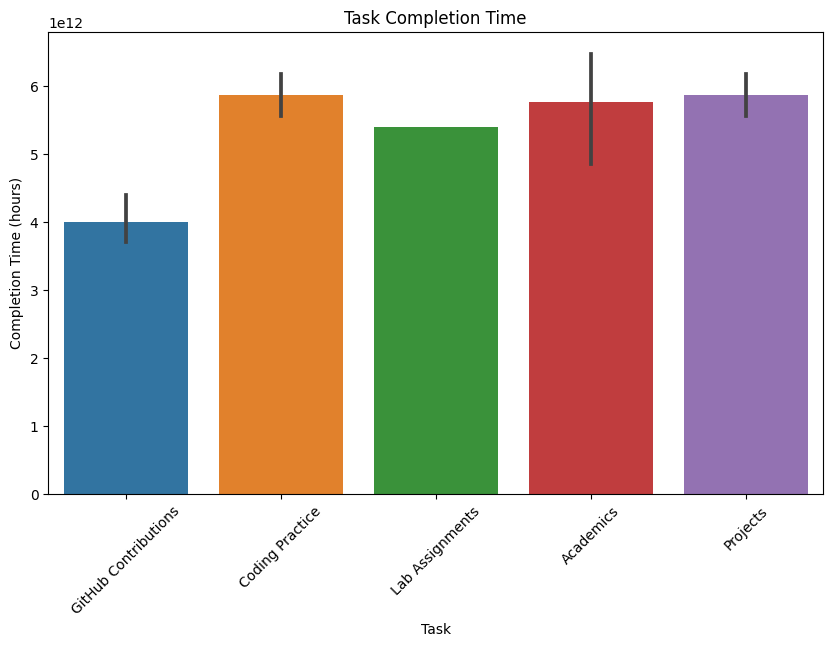

In [50]:
# Visualizing Task Completion Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Task', y='Task Completion Time', data=data)
plt.title('Task Completion Time')
plt.xlabel('Task')
plt.ylabel('Completion Time (hours)')
plt.xticks(rotation=45)
plt.show()

In [51]:

# Calculate Efficiency (rate of completed tasks to the total number of tasks )
#data["Task Completion Time"] = pd.to_datetime(data["Task Completion Time"])
#data['Task Completion Time'] = data['Task Completion Time']
data['Efficiency'] = data['Tasks Completed'] / data['Task Completion Time']

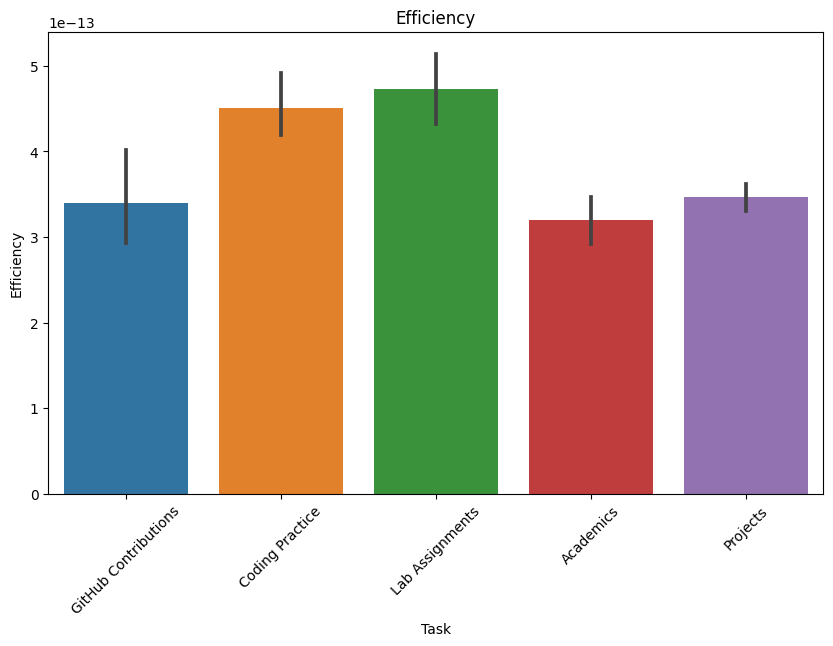

In [53]:

# Visualize Efficiency
plt.figure(figsize=(10, 6))
sns.barplot(x='Task', y='Efficiency', data=data)
plt.title('Efficiency')
plt.xlabel('Task')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.show()


In [54]:
# Calculate Productivity (tasks done per day)
data['Productivity'] = data.groupby('Date')['Tasks Completed'].transform('sum')

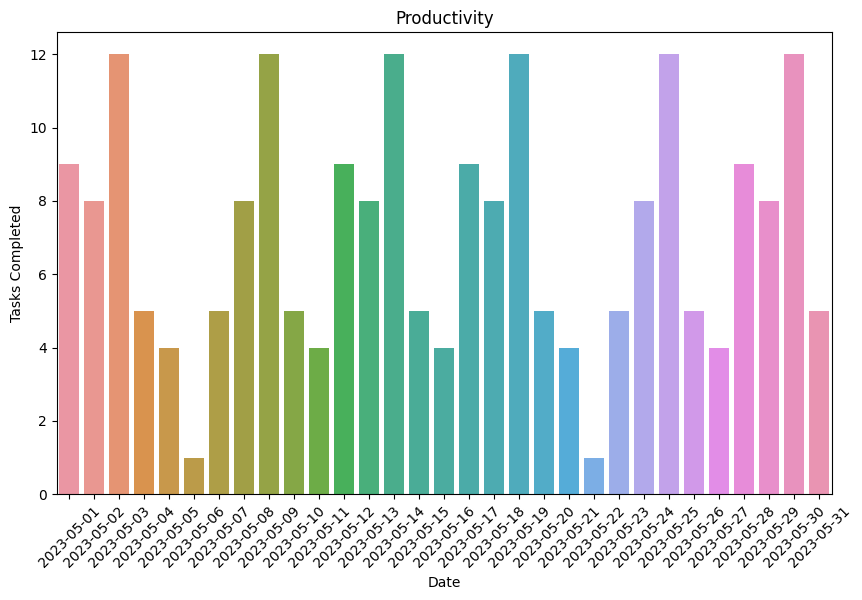

In [55]:
# Visualize Productivity
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Productivity', data=data)
plt.title('Productivity')
plt.xlabel('Date')
plt.ylabel('Tasks Completed')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Calculate Distractions
data['Breaks'] = pd.to_timedelta(data['Breaks'])
data['Distractions'] = data['Breaks']


In [72]:
# Converting 'Distractions' column to numeric 
data['Distractions'] = pd.to_numeric(data['Distractions'])

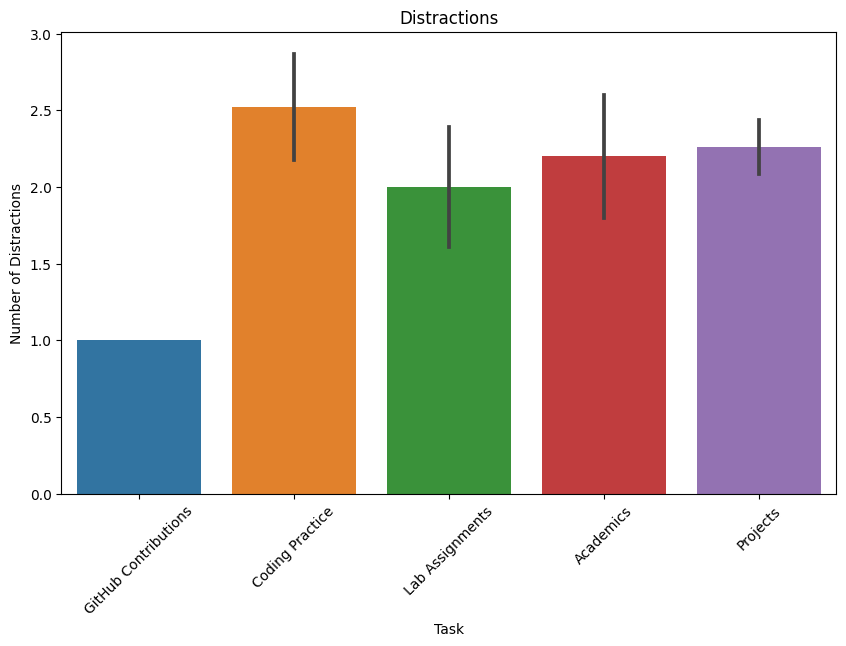

In [73]:
# Visualize Distractions
plt.figure(figsize=(10, 6))
sns.barplot(x='Task', y='Distractions', data=data)
plt.title('Distractions')
plt.xlabel('Task')
plt.ylabel('Number of Distractions')
plt.xticks(rotation=45)
plt.show()

# # # Finding the task having least number of breaks 

In [76]:
# Sort the database by "Breaks" column in ascending order
sorted_data = data.sort_values('Breaks')

# Select the task with the least number of breaks 
task_least_breaks = sorted_data.loc[sorted_data['Breaks'].idxmin(), 'Task'] # finding the index of the row with the minimum entry of breaks column

# Print the taks with the least number of breaks 

print("Task with the least number of breaks:")
print(task_least_breaks)

Task with the least number of breaks:
GitHub Contributions


# # Finding the task having least number of distractions 

In [77]:
# Sort the database by "Ditractions" column in ascending order
sorted_data = data.sort_values('Distractions')

# Select the task with the least number of breaks 
task_least_distractions = sorted_data.loc[sorted_data['Distractions'].idxmin(), 'Task'] # finding the index of the row with the minimum entry of distratcions column

# Print the taks with the least number of breaks 

print("Task with the least number of distractions:")
print(task_least_breaks)

Task with the least number of distractions:
GitHub Contributions


# Finding the task completed most of the time 

In [79]:
# Convert 'Completed' column to numeric format
data['Completed'] = data['Completed'].map({'Yes': 1, 'No': 0})

In [80]:
# Calculate the sum of completed tasks for each task
task_completion_counts = data.groupby('Task')['Completed'].sum()

# Find the task with the highest sum of completed tasks
task_most_completed = task_completion_counts.idxmax()

# Get the count of completed tasks for the task with the highest sum
count_most_completed = task_completion_counts.max()

# Print the task completed most of the time
print("Task completed most of the time:")
print(f"Task: {task_most_completed}")
print(f"Number of times completed: {count_most_completed}")


Task completed most of the time:
Task: Coding Practice
Number of times completed: 23


# Finding the best time for performing a particulr task considering it gets completed with least number of breaks and distractions 


In [109]:
# Group the data by task and calculate the sum of breaks and distractions
task_performance = data.groupby('Task').agg({'Breaks': 'sum', 'Distractions': 'sum'})

# Sort the tasks based on the sum of breaks and distractions in ascending order
task_performance = task_performance.sort_values(['Breaks', 'Distractions'], ascending=[True, True])

# Get the unique tasks from the dataset
unique_tasks = data['Task'].unique()

# Create lists to store task names and best suitable times
task_names = []
best_suitable_times = []

# Iterate over each unique task
for task in unique_tasks:
    # Filter the dataset for the current task
    task_data = data[data['Task'] == task]
    
    # Sort the filtered data by start time
    task_data = task_data.sort_values('Start Time')
    
    # Get the best suitable time for the task (start time of the first entry)
    best_suitable_time = task_data['Start Time'].iloc[0].time()
    
    # Convert the time object to string representation
    best_suitable_time_str = best_suitable_time.strftime('%H:%M')
    
    # Append the task name and best suitable time to the lists
    task_names.append(task)
    best_suitable_times.append(best_suitable_time_str)

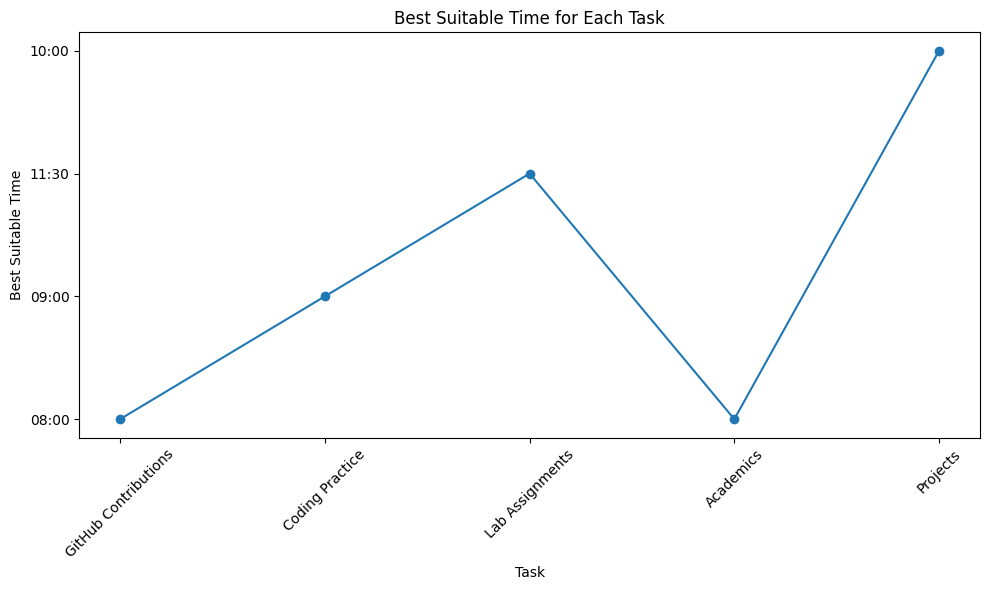

In [110]:
# Create a line plot of the best suitable times
plt.figure(figsize=(10, 6))
plt.plot(task_names, best_suitable_times, marker='o')
plt.xlabel('Task')
plt.ylabel('Best Suitable Time')
plt.title('Best Suitable Time for Each Task')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dividing the taks suitable for weekdays or weekends 

In [132]:

# Convert "Day Type" values to uppercase
data["Day Type"] = data["Day Type"].str.upper()

# Calculate average completion rates, distractions, and breaks for weekdays and weekends
summary = data.groupby(["Task", "Day Type"]).agg(
    Avg_Distractions=("Distractions", "mean"),
    Avg_Breaks=("Breaks", "mean"),
    Completion_Rate=("Completed", "mean")
).reset_index()

# Find tasks with higher avg. distratction rates for weekdays and weekends
weekday_tasks = summary[summary["Day Type"] == "W"].sort_values("Avg_Distractions", ascending=True)
weekend_tasks = summary[summary["Day Type"] == "WE"].sort_values("Avg_Distractions", ascending=True)

# Display tasks with higher completion rates for weekdays
print("Summary for Weekdays:")
print(weekday_tasks)

# Display tasks with higher completion rates for weekends
print("Summary for Weekends:")
print(weekend_tasks)

# Pivot the summary table to have tasks as rows and day types as columns
pivot_summary = summary.pivot(index="Task", columns="Day Type")

# Calculate the average distractions for each task
avg_distractions = pivot_summary["Avg_Distractions"]

# Classify tasks as better for weekends or weekdays based on average distractions
tasks_better_for_weekdays = avg_distractions[avg_distractions["W"] < avg_distractions["WE"]]
tasks_better_for_weekends = avg_distractions[avg_distractions["W"] > avg_distractions["WE"]]
tasks_better_for_weekends_and_weekdays = avg_distractions[avg_distractions["W"] == avg_distractions['WE']]

# Display tasks better for weekdays
print("Tasks Better for Weekdays:")
print(tasks_better_for_weekdays)

# Display tasks better for weekends
print("Tasks Better for Weekends:")
print(tasks_better_for_weekends)

# Display tasks better for both weekends as well as weekdays 
print("Tasks Better for Weekdays as well as weekends:")
print(tasks_better_for_weekends_and_weekdays)


Summary for Weekdays:
                   Task Day Type  Avg_Distractions                Avg_Breaks   
4  GitHub Contributions        W          1.000000 0 days 00:00:00.000000001  \
6       Lab Assignments        W          1.800000 0 days 00:00:00.000000001   
8              Projects        W          2.000000 0 days 00:00:00.000000002   
0             Academics        W          2.090909 0 days 00:00:00.000000002   
2       Coding Practice        W          3.111111 0 days 00:00:00.000000003   

   Completion_Rate  
4              1.0  
6              1.0  
8              1.0  
0              1.0  
2              1.0  
Summary for Weekends:
                   Task Day Type  Avg_Distractions                Avg_Breaks   
5  GitHub Contributions       WE          1.000000 0 days 00:00:00.000000001  \
3       Coding Practice       WE          2.142857 0 days 00:00:00.000000002   
7       Lab Assignments       WE          2.250000 0 days 00:00:00.000000002   
1             Academics      

C:\Users\Aisha\AppData\Local\Temp\ipykernel_22332\913061672.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


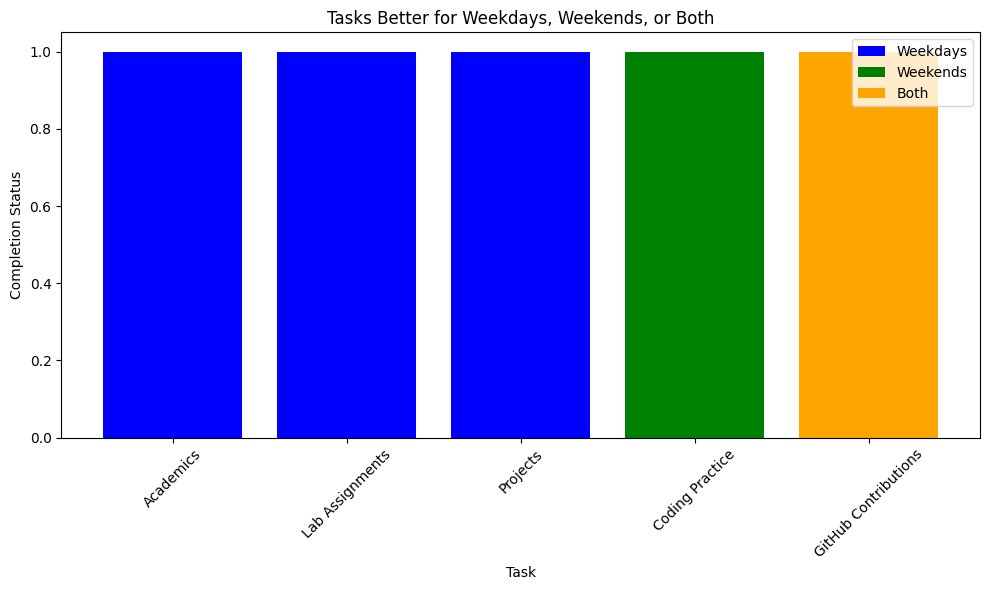

In [144]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tasks better for weekdays
ax.bar(tasks_better_for_weekdays.index, [1] * len(tasks_better_for_weekdays), color="blue", label="Weekdays")

# Plot tasks better for weekends
ax.bar(tasks_better_for_weekends.index, [1] * len(tasks_better_for_weekends), color="green", label="Weekends")

# Plot tasks better for both weekdays and weekends
ax.bar(tasks_better_for_weekends_and_weekdays.index, [1] * len(tasks_better_for_weekends_and_weekdays), color="orange", label="Both")

# Set labels and title
ax.set_xlabel("Task")
ax.set_ylabel("Completion Status")
ax.set_title("Tasks Better for Weekdays, Weekends, or Both")

# Set x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

# Average Time taken for each task to get completed 

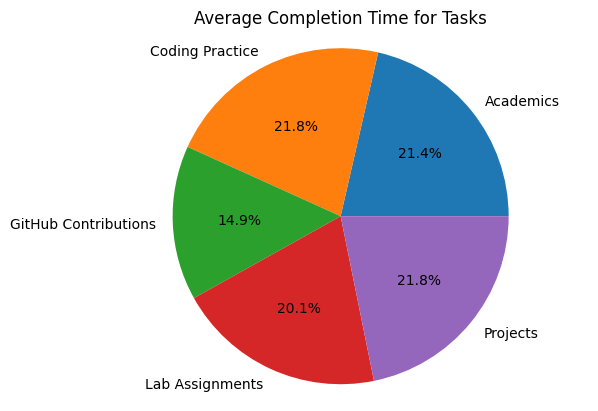

In [146]:
# Calculate the average completion time for each task 
avg_completion_time = data.groupby("Task")["Task Completion Time"].mean()

# Create a pie chart 
plt.pie(avg_completion_time, labels=avg_completion_time.index, autopct='%1.1f%%')

# Set the aspect ratio to make the pie chart circular
plt.axis('equal')

# Set the title of the pie chart
plt.title('Average Completion Time for Tasks')

# Display the pie chart
plt.show()